In [15]:
import numpy as np
import librosa
import librosa.display
import datetime
import matplotlib.pyplot as plt
import IPython

In [16]:
path = 'guitardrums.wav'
y, sr = librosa.load(path, sr=None)

In [17]:
IPython.display.Audio(y, rate=sr)

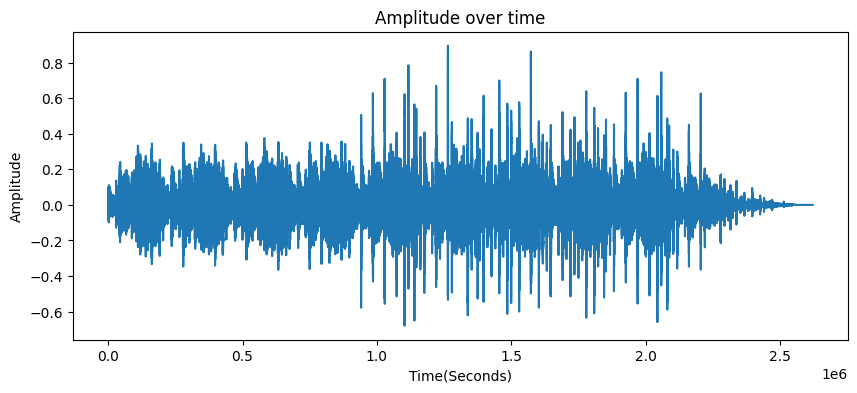

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Amplitude over time')
plt.xlabel('Time(Seconds)')
plt.ylabel('Amplitude')
plt.show()

C:\Users\Lukas\AppData\Local\Temp\ipykernel_12320\2000513488.py:5: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[0], fmin=20, fmax=20000, hop_length=2048)


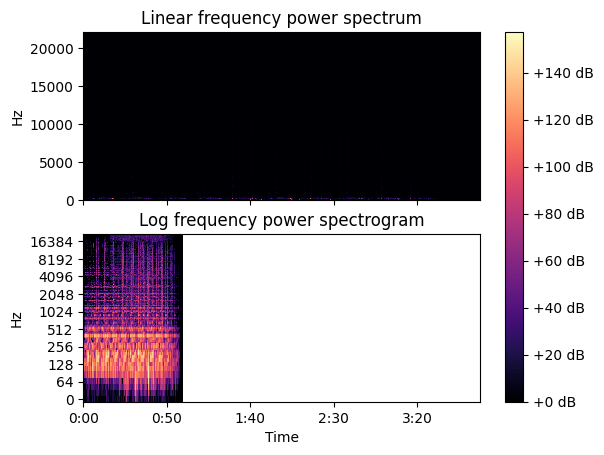

In [24]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)  # Corrected 'nrows' parameter
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[0], fmin=20, fmax=20000, hop_length=2048)
ax[0].set(title='Linear frequency power spectrum')
ax[0].label_outer()

hop_length = 2048
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)), ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax[1])

ax[1].set(title='Log frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()



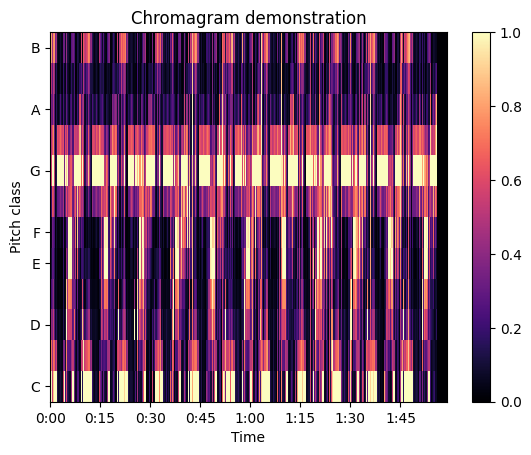

In [26]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram demonstration')
fig.colorbar(img, ax=ax)
plt.show()

In [29]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
length = librosa.get_duration(y=y, sr=sr)

print('The tempo of the song is : ' + str(round(tempo)) + 'BPM')
print('The song lengt is ' + str(datetime.timedelta(seconds=round(length))))


The tempo of the song is : 91BPM
The song lengt is 0:00:59


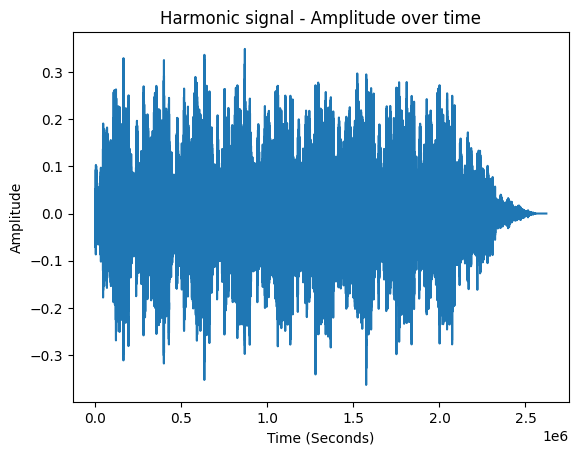

In [31]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

fig, ax = plt.subplots()
ax.plot(y_harmonic)
ax.set(title='Harmonic signal - Amplitude over time')
ax.set_xlabel('Time (Seconds)')
ax.set_ylabel('Amplitude')
plt.show()

In [ ]:
IPython.display.Audio(y_harmonic)

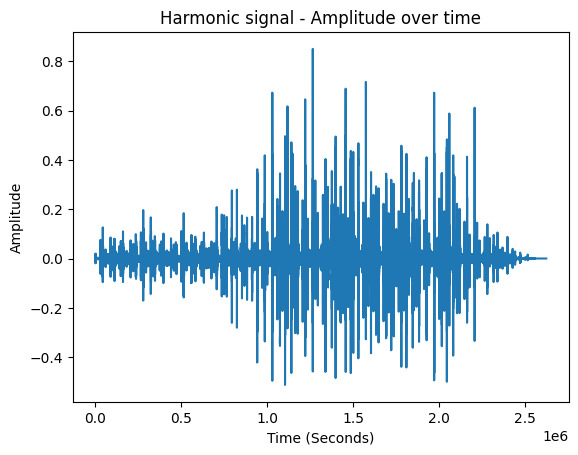

In [32]:

fig, ax = plt.subplots()
ax.plot(y_percussive)
ax.set(title='Harmonic signal - Amplitude over time')
ax.set_xlabel('Time (Seconds)')
ax.set_ylabel('Amplitude')
plt.show()

In [ ]:
IPython.display.Audio(y_percussive)